# Determining the sismic wave polarisation in the Vatnajokull ice
Realised in the frame of a master thesis\
Author : Julien Govoorts

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def closest(array, value) :
    idx = (np.abs(array - value)).argmin()
    print(array[idx])
    return idx

In [21]:
'''
This module analyse the HV rotation results of Geopsy to determine the wave polarisation in the ice.

direct : Folder directory of the hv.grid geopsy file 
stt : Name of the geopsy file without .hv.grid. Generally correspond to the name of the station (string)
n_Y : Azimuth step (integer). Ex : 10 will create an array like : 0, 10, 20, ... Whereas n_Y = 1 lead to an array like : 0,1,2,3,...

Université libre de Bruxelles
Julien Govoorts

'''

def polar(direct, stt, n_Y) :
    X = []
    Y = list(range(0,180+n_Y,n_Y))

    with open(direct+stt+'.hv.grid') as file :
        readcsv = csv.reader(file, delimiter=' ')
        line = 0
        for row in readcsv :
            if line == 1 :
                X.append(float(row[0]))
            elif line > 1 and X[0] != float(row[0]) :
                x = float(row[0])
                X.append(x)
            elif line > 1 and X[0] == float(row[0]):
                break
            line += 1
    
    #print(X)
    #print(Y)
    #idx = closest(np.array(X),F0[1])
    #print(idx)
    #MAXAMP = []
    #for i in range(len(Y)) :
    #    n = i+1
    #    MAXAMP.append(AMP[idx*(n)])
    #print(MAXAMP)
    
    AMP3D = []
    
    for i in Y :
        AMP3D.append([])

    X3D = []
    Y3D = []

    with open(direct+stt+'.hv.grid') as file :
        readcsv = csv.reader(file, delimiter=' ')
        line = 0
        n_amp = 0
        for row in readcsv :
            if line > 0 :
                if X[0] == float(row[0]) and line != 1 :
                    n_amp += 1
                AMP3D[n_amp].append(float(row[2]))
            line += 1
            
    XMAXVAL = []
    XMINVAL = []
    
    for azi in range(len(AMP3D)) :
        idx_max = np.array(AMP3D[azi]).argmax()
        idx_min = np.array(AMP3D[azi]).argmin()
        XMAXVAL.append(X[idx_max])
        XMINVAL.append(X[idx_min])
        
    for i in Y :
        X3D.append(X)
    for i in Y :
        Ytemp = []
        for j in X :
            Ytemp.append(i)
        Y3D.append(Ytemp)

    X3D = np.array(X3D)
    Y3D = np.array(Y3D)
    AMP3D = np.array(AMP3D)

    mean = np.mean(AMP3D, axis = -1)
    median = np.median(AMP3D, axis = -1)
    index_max = np.argmax(mean)

    fig = plt.subplots(1, 3, figsize=(15, 5))
    plt.subplot(1,2,1)
    #ax = plt.axes(projection ='3d')
    #ax.plot_surface(X3D, Y3D, AMP3D,cmap='viridis', edgecolor='none')
    surf = plt.contourf(X3D, Y3D, AMP3D, 30)
    plt.xscale('log')
    plt.plot(XMAXVAL,Y, c='red', linestyle='--')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Azimuth (degree)')
    plt.title('Polarisation : ' +str(Y[index_max])+ ' degree')
    plt.colorbar(surf, shrink=1, aspect=10, label = "Amplitude H/V")
    plt.subplot(1,2,2)
    plt.plot(mean, Y, label='Mean')
    plt.plot(median, Y, label='Median')
    plt.ylabel('Azimuth (degree)')
    plt.xlabel('Mean amplitude H/V')
    plt.show()

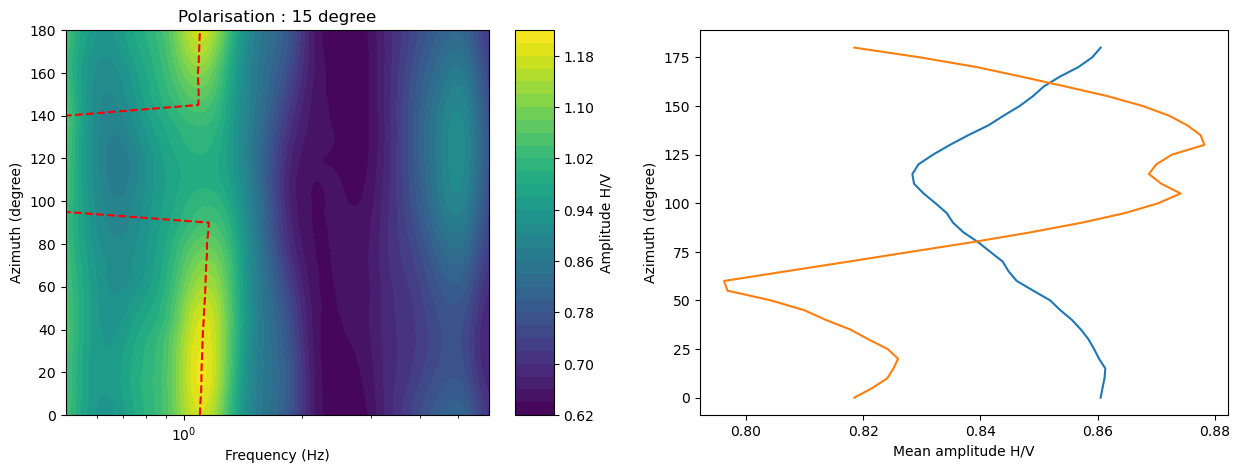

In [24]:
direct = 'D:\\MEMOIRE\\Geopsy_res\\d07m05h19h24hz05hz6'
stt = '\\SS_2077"'
polar(direct,stt,5)

In [5]:
# Add local module to the path
import os, sys
koen = os.path.abspath('Module_KoenVanNoten//')
if koen not in sys.path:
    sys.path.append(koen)


In [6]:
from plot_polarisation import plot_rotationaldata

In [10]:
plot_rotationaldata('D:\\MEMOIRE\\Geopsy_res\\d07m05h19h24hz05hz6\\SS_20739.hv.grid','SS_20739',0.5,6)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [12]:
print(AMP3D)

NameError: name 'AMP3D' is not defined